**Yolov5 for Image Classification**

In [1]:
# !git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


**Libraries**

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import os
import time
import uuid

**Image Classification**

Load pre-trained model **ultralytics** from yolov5

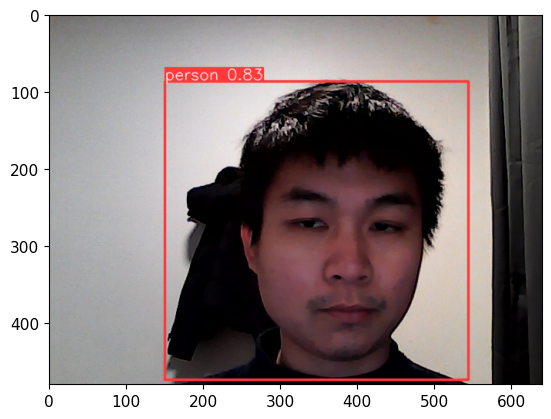

In [5]:
# result = model(os.path.join('data', 'images', 'ok.e4e40e31-bae5-11ed-9fc9-346f24ea6371.jpg'))
# %matplotlib inline
# plt.imshow(np.squeeze(result.render()))
# plt.show()

**Train**

In [4]:
# image = os.path.join('data', 'images')
# labels = ['ok', 'alert']
# num_img = 20

In [11]:
# camera = cv.VideoCapture(0)
# for label in labels:
#     print('Collecting...{}'.format(label))
#     time.sleep(5)
#     for num in range(num_img):
#         print('{}, {}'.format(label, num))
#         ret, frame = camera.read()
#         img_name = os.path.join(image, label + '.' + str(uuid.uuid1()) + '.jpg')
#         cv.imwrite(img_name, frame)
#         cv.imshow('Data collecting', frame)
#         time.sleep(2)
#         if cv.waitKey(10) & 0xFF == ord('q'):
#             break
# camera.release()
# cv.destroyAllWindows()

Collecting...ok
ok, 0
ok, 1
ok, 2
ok, 3
ok, 4
ok, 5
ok, 6
ok, 7
ok, 8
ok, 9
ok, 10
ok, 11
ok, 12
ok, 13
ok, 14
ok, 15
ok, 16
ok, 17
ok, 18
ok, 19
Collecting...alert
alert, 0
alert, 1
alert, 2
alert, 3
alert, 4
alert, 5
alert, 6
alert, 7
alert, 8
alert, 9
alert, 10
alert, 11
alert, 12
alert, 13
alert, 14
alert, 15
alert, 16
alert, 17
alert, 18
alert, 19


In [7]:
# !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [8]:
# !cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\ADMIN\Desktop\ME': No such file or directory
YOLOv5  2023-3-6 Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, 

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\Users\ADMIN\Desktop\ME': No such file or directory
YOLOv5  2023-3-6 Python-3.9.13 torch-1.13.1+cu117 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, 

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2 as cv
import os
import time
import uuid

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ADMIN/.cache\torch\hub\master.zip
YOLOv5  2023-4-13 Python-3.10.9 torch-2.0.0+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients
Adding AutoShape... 


In [3]:
class Stage1:
    def webcam(self, queueS1, queueS2):
        camera = cv.VideoCapture(0)
        count = 0
        while camera.isOpened():
            ret, frame = camera.read()
            result = model(frame)           #pass frame to ultralytics model
            cv.imshow('Detection', np.squeeze(result.render()))
            s = ""
            if result.pred[0].shape[0]:
                for c in result.pred[0][:, -1].unique():
                    n = (result.pred[0][:, -1] == c).sum()  # detections per class
                    s += f"{n} {result.names[int(c)]}{'s' * (n > 1)}, "  # add to string
                t = s.split(' ')[1].replace(',','')
                if t == 'alert':
                    count += 1
                else:
                    count = 0
                if count == 10:
                    queueS1.put('stop')
            if cv.waitKey(10) & 0xFF == ord('q'):
                break
        camera.release()
        cv.destroyAllWindows()
        return